# Logistic regression

**Logistic regression and regularization**

regularization combats overfitting by making the model coefficients smaller.

in sklearn,`C`is the inverse of the regularization strength. meaning larger `C` means less regularization and smaller `C` means more regularization

Regularization make a training accuracy go down, because it penalizes large coefficients. 

regularized loss = original loss + large coefficient penalty.
* without regularization, we are maximizing the training accuracy.
* but regularization improves the test accuracy, regularization courses you to overfit less.

**L1 vs L2 regularization**

Lasso=linear regression with L1 regularization
Ridge=linear regression with L2 regularization

both helps to reduce over fiting and L1 performs feature selection as well.

In [1]:
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
X=data.data
y=data.target
print(f'X shape is {X.shape} \ny shape is {y.shape}')

X shape is (569, 30) 
y shape is (569,)


In [2]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression

In [3]:
import matplotlib.pyplot as plt

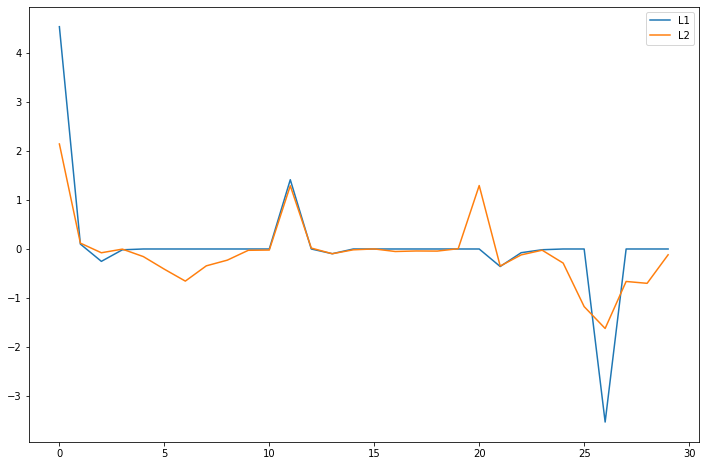

In [6]:
lr_L1 = LogisticRegression(solver='liblinear',penalty='l1')
lr_L2 = LogisticRegression(solver='liblinear') # penalty='l2' by default
lr_L1.fit(X, y)
lr_L2.fit(X, y)

plt.figure(figsize=(12,8))
plt.plot(lr_L1.coef_.flatten(),label='L1')
plt.plot(lr_L2.coef_.flatten(),label='L2')
plt.legend()
plt.show()

As you can see, L1 regularization set many of the coefficients to zero, thus ignoring those features; in other words, it performed feature selection for us. On the other hand, L2 regularization just shrinks the coefficients to be smaller. This is analogous to what happens with Lasso and Ridge regression.

In [7]:
from sklearn.datasets import load_digits

data=load_digits()
X=data.data
y=data.target
X.shape

(1797, 64)

In [12]:
from sklearn.model_selection import train_test_split

X_train,X_valid,y_train,y_valid=train_test_split(X,y,test_size=0.25)

print("X_train ",X_train.shape)
print("X_valid ",X_valid.shape)

X_train  (1347, 64)
X_valid  (450, 64)


## Regularized logistic regression

In Chapter 1, you used logistic regression on the handwritten digits data set. Here, we'll explore the effect of L2 regularization.

The handwritten digits dataset is already loaded, split, and stored in the variables X_train, y_train, X_valid, and y_valid. The variables train_errs and valid_errs are already initialized as empty lists.

**Instructions**

* Loop over the different values of C_value, creating and fitting a LogisticRegression model each time.
* Save the error on the training set and the validation set for each model.
* Create a plot of the training and testing error as a function of the regularization parameter, C.
* Looking at the plot, what's the best value of C?

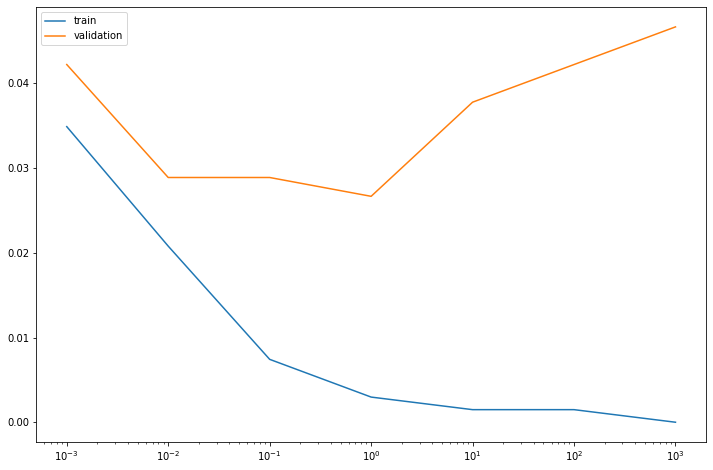

In [16]:
# Train and validaton errors initialized as empty list
train_errs = list()
valid_errs = list()
C_values=[0.001, 0.01, 0.1, 1, 10, 100, 1000]
# Loop over values of C_value
for C_value in [0.001, 0.01, 0.1, 1, 10, 100, 1000]:
    # Create LogisticRegression object and fit
    lr = LogisticRegression(solver='liblinear',C=C_value)
    lr.fit(X_train,y_train)
    
    # Evaluate error rates and append to lists
    train_errs.append( 1.0 - lr.score(X_train,y_train) )
    valid_errs.append( 1.0 - lr.score(X_valid,y_valid) )
    
# Plot results
plt.figure(figsize=(12,8))
plt.semilogx(C_values, train_errs, C_values, valid_errs)
plt.legend(("train", "validation"))
plt.show()

As you can see, too much regularization (small C) doesn't work well - due to underfitting - and too little regularization (large C) doesn't work well either - due to overfitting

## Logistic regression and feature selection
In this exercise we'll perform feature selection on the movie review sentiment data set using L1 regularization. The features and targets are already loaded for you in X_train and y_train.

We'll search for the best value of C using scikit-learn's GridSearchCV(), which was covered in the prerequisite course.

**Instructions**

* Instantiate a logistic regression object that uses L1 regularization.
* Find the value of C that minimizes cross-validation error.
* Print out the number of selected features for this value of C.

In [46]:
movie_rev=pd.read_table("labeledTrainData.tsv")
#movie_rev_train=movie_rev.iloc[0:2000,:]
X_train,y_train=movie_rev['review'][0:2000],movie_rev['sentiment'][0:2000]
X_test,y_test=movie_rev['review'][2000:4000],movie_rev['sentiment'][2000:4000]

import re
#'''
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    return text
#'''
## Bag of Words
from sklearn.feature_extraction.text import CountVectorizer
count_vector = CountVectorizer(lowercase=True,token_pattern = '(?u)\\b\\w\\w+\\b',stop_words='english',preprocessor=preprocess_text)

# Fit the training data and then return the sparse matrix
training_data = count_vector.fit_transform(X_train)
X_train=training_data
# Transform testing data and return the sparse matrix. Note we are not fitting the testing data into the CountVectorizer()
testing_data = count_vector.transform(X_test)
X_test=testing_data

In [53]:
print(f'number of features are Bagging {len(count_vector.get_feature_names())}')
print(f'shape after bagging {X_train.shape}')

number of features are Bagging 25190
shape after bagging (2000, 25190)


In [54]:
from sklearn.model_selection import GridSearchCV

# Specify L1 regularization
lr = LogisticRegression(penalty='l1',solver='liblinear')

# Instantiate the GridSearchCV object and run the search
searcher = GridSearchCV(lr, {'C':[0.001, 0.01, 0.1, 1, 10]})
searcher.fit(X_train, y_train)

# Report the best parameters
print("Best CV params", searcher.best_params_)

# Find the number of nonzero coefficients (selected features)
best_lr = searcher.best_estimator_
coefs = best_lr.coef_
print("Total number of features:", coefs.size)
print("Number of selected features:", np.count_nonzero(coefs))

Best CV params {'C': 1}
Total number of features: 25190
Number of selected features: 662


As you can see, a whole lot of features were discarded here.

In [61]:
searcher.best_params_['C']

1

In [55]:
print(best_lr)

LogisticRegression(C=1, penalty='l1', solver='liblinear')


In [62]:
lr=LogisticRegression(C=searcher.best_params_['C'], penalty='l1', solver='liblinear')
lr.fit(X_train, y_train)

LogisticRegression(C=1, penalty='l1', solver='liblinear')

## Identifying the most positive and negative words

In this exercise we'll try to interpret the coefficients of a logistic regression fit on the movie review sentiment dataset. The model object is already instantiated and fit for you in the variable lr.

In addition, the words corresponding to the different features are loaded into the variable vocab. For example, since vocab[100] is "accepted", that means feature 100 corresponds to the number of times the word "think" appeared in that movie review.

In [57]:
vocab=count_vector.get_feature_names()
vocab[100]

'accepted'

**Instructions**

* Find the words corresponding to the 5 largest coefficients.
* Find the words corresponding to the 5 smallest coefficients.

In [66]:
# Get the indices of the sorted cofficients
inds_ascending = np.argsort(lr.coef_.flatten()) 
inds_descending = inds_ascending[::-1]

# Print the most positive words
print("Most positive words: ", end="")
for i in range(5):
    print(vocab[inds_descending[i]], end=", ")
print("\n")

# Print most negative words
print("Most negative words: ", end="")
for i in range(5):
    print(vocab[inds_ascending[i]], end=", ")
print("\n")

Most positive words: meets, highly, brought, brilliant, hilarious, 

Most negative words: waste, worst, poorly, disappointing, disappointment, 



The positive and negative words makes sense.

## Logistic regression and probabilities

smaller coefficients means less confident predictions, regularization is supposed to combat overfitting, and there's a connection between overconfidence and overfitting

## Regularization and probabilities

In this exercise, you will observe the effects of changing the regularization strength on the predicted probabilities.

A 2D binary classification dataset is already loaded into the environment as X and y.

[linear classifiers](https://datascience103579984.wordpress.com/2019/09/18/linear-classifiers-in-python-from-datacamp/)

In [68]:
X=np.array([[ 1.78862847,  0.43650985],
       [ 0.09649747, -1.8634927 ],
       [-0.2773882 , -0.35475898],
       [-3.08274148,  2.37299932],
       [-3.04381817,  2.52278197],
       [-1.31386475,  0.88462238],
       [-2.11868196,  4.70957306],
       [-2.94996636,  2.59532259],
       [-3.54535995,  1.45352268],
       [ 0.98236743, -1.10106763],
       [-1.18504653, -0.2056499 ],
       [-1.51385164,  3.23671627],
       [-4.02378514,  2.2870068 ],
       [ 0.62524497, -0.16051336],
       [-3.76883635,  2.76996928],
       [ 0.74505627,  1.97611078],
       [-1.24412333, -0.62641691],
       [-0.80376609, -2.41908317],
       [-0.92379202, -1.02387576],
       [ 1.12397796, -0.13191423]])

y=np.array([-1, -1, -1,  1,  1, -1,  1,  1,  1, -1, -1,  1,  1, -1,  1, -1, -1,
       -1, -1, -1])

In [69]:
X.shape

(20, 2)

2 Features,20 instances

In [76]:
def make_meshgrid(x, y, h=.02, lims=None):
    """Create a mesh of points to plot in
    
    Parameters
    ----------
        x: data to base x-axis meshgrid on
        y: data to base y-axis meshgrid on
        h: stepsize for meshgrid, optional
        
    Returns
    -------
        xx, yy : ndarray
    """
    
    if lims is None:
        x_min, x_max = x.min() - 1, x.max() + 1
        y_min, y_max = y.min() - 1, y.max() + 1
    else:
        x_min, x_max, y_min, y_max = lims
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, proba=False, **params):
    """Plot the decision boundaries for a classifier.
    
    Parameters
    ----------
        ax: matplotlib axes object
        clf: a classifier
        xx: meshgrid ndarray
        yy: meshgrid ndarray
        params: dictionary of params to pass to contourf, optional
    """
    if proba:
        Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,-1]
        Z = Z.reshape(xx.shape)
        out = ax.imshow(Z,extent=(np.min(xx), np.max(xx), np.min(yy), np.max(yy)), 
                        origin='lower', vmin=0, vmax=1, **params)
        ax.contour(xx, yy, Z, levels=[0.5])
    else:
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        out = ax.contourf(xx, yy, Z, **params)
    return out

def plot_classifier(X, y, clf, ax=None, ticks=False, proba=False, lims=None): 
    # assumes classifier "clf" is already fit
    X0, X1 = X[:, 0], X[:, 1]
    xx, yy = make_meshgrid(X0, X1, lims=lims)
    
    if ax is None:
        plt.figure(figsize=(12,18))
        ax = plt.gca()
        show = True
    else:
        show = False
        
    # can abstract some of this into a higher-level function for learners to call
    cs = plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8, proba=proba)
    if proba:
        cbar = plt.colorbar(cs)
        cbar.ax.set_ylabel('probability of red $\Delta$ class', fontsize=20, rotation=270, labelpad=30)
        cbar.ax.tick_params(labelsize=14)
        #ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=30, edgecolors=\'k\', linewidth=1)
    labels = np.unique(y)
    if len(labels) == 2:
        ax.scatter(X0[y==labels[0]], X1[y==labels[0]], cmap=plt.cm.coolwarm, 
                   s=60, c='b', marker='o', edgecolors='k')
        ax.scatter(X0[y==labels[1]], X1[y==labels[1]], cmap=plt.cm.coolwarm, 
                   s=60, c='r', marker='^', edgecolors='k')
    else:
        ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=50, edgecolors='k', linewidth=1)

    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    #     ax.set_xlabel(data.feature_names[0])
    #     ax.set_ylabel(data.feature_names[1])
    if ticks:
        ax.set_xticks(())
        ax.set_yticks(())
        #     ax.set_title(title)
    if show:
        plt.show()
    else:
        return ax

**Instructions**

1.  * Compute the maximum predicted probability.
    * Run the provided code and take a look at the plot.
2. Create a model with C=0.1 and examine how the plot and probabilities change.

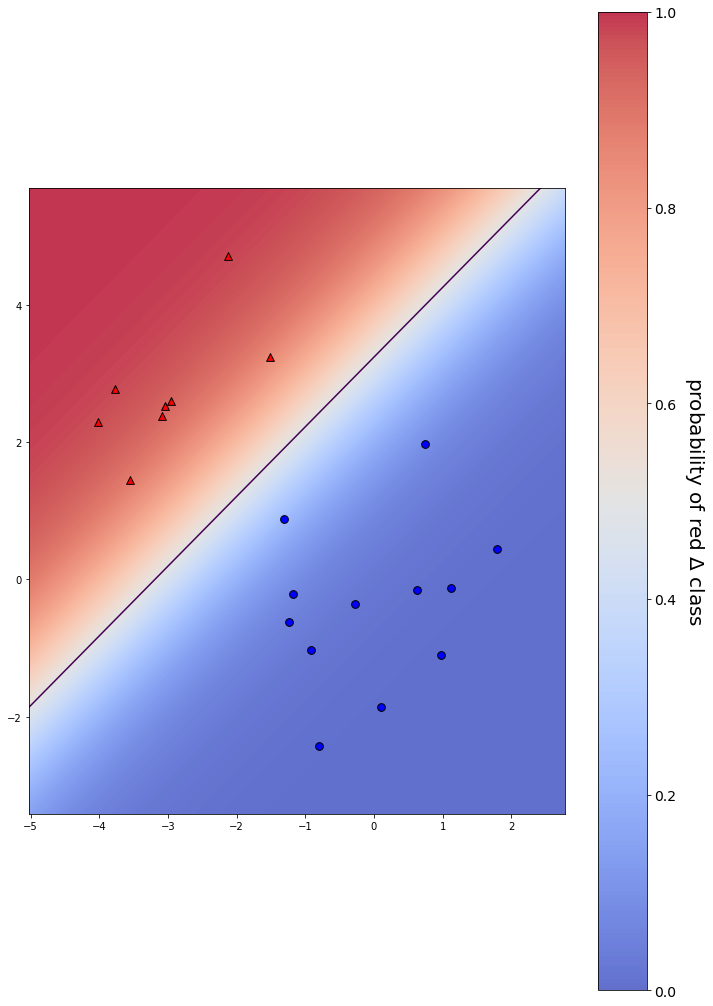

Maximum predicted probability 0.9973143426717812


In [77]:
# Set the regularization strength
model = LogisticRegression(C=1)

# Fit and plot
model.fit(X,y)
plot_classifier(X,y,model,proba=True)

# Predict probabilities on training points
prob = model.predict_proba(X)
print("Maximum predicted probability", np.max(prob))

In [71]:
prob

array([[0.99405586, 0.00594414],
       [0.99687634, 0.00312366],
       [0.97519425, 0.02480575],
       [0.07508115, 0.92491885],
       [0.06701697, 0.93298303],
       [0.75592289, 0.24407711],
       [0.0176815 , 0.9823185 ],
       [0.06860884, 0.93139116],
       [0.11793859, 0.88206141],
       [0.99731434, 0.00268566],
       [0.92305473, 0.07694527],
       [0.15404902, 0.84595098],
       [0.03003362, 0.96996638],
       [0.98870549, 0.01129451],
       [0.02357726, 0.97642274],
       [0.90355301, 0.09644699],
       [0.94708723, 0.05291277],
       [0.99536056, 0.00463944],
       [0.97554319, 0.02445681],
       [0.99331846, 0.00668154]])

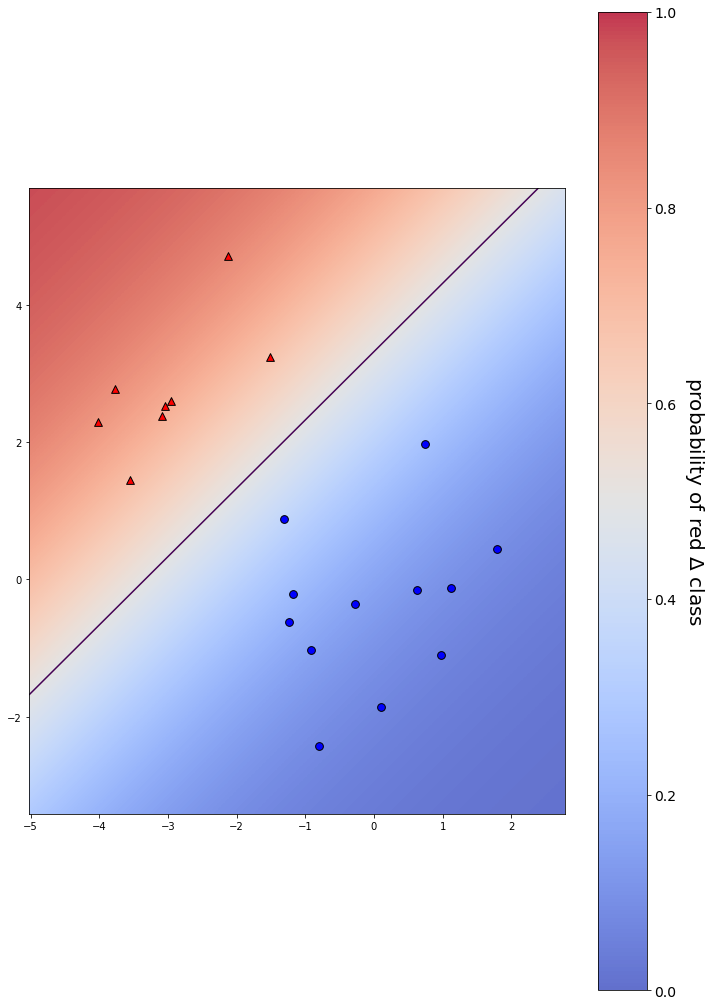

Maximum predicted probability 0.9352061679007129


In [78]:
# Set the regularization strength
model = LogisticRegression(C=0.1)

# Fit and plot
model.fit(X,y)
plot_classifier(X,y,model,proba=True)

# Predict probabilities on training points
prob = model.predict_proba(X)
print("Maximum predicted probability", np.max(prob))

As you probably noticed, smaller values of C lead to less confident predictions. That's because smaller C means more regularization, which in turn means smaller coefficients, which means raw model outputs closer to zero and, thus, probabilities closer to 0.5 after the raw model output is squashed through the sigmoid function. That's quite a chain of events!

## Visualizing easy and difficult examples

In this exercise, you'll visualize the examples that the logistic regression model is most and least confident about by looking at the largest and smallest predicted probabilities.

The handwritten digits dataset is already loaded into the variables X and y. The show_digit function takes in an integer index and plots the corresponding image, with some extra information displayed above the image.

In [79]:
from sklearn.datasets import load_digits

data=load_digits()
X=data.data
y=data.target
X.shape

(1797, 64)

**Instructions**

* Fill in the first blank with the index of the digit that the model is most confident about.
* Fill in the second blank with the index of the digit that the model is least confident about.
* Observe the images: do you agree that the first one is less ambiguous than the second?

In [90]:
'''
def show_digit(ind,model):
    plt.imshow(X[ind],cmap='gray',interpolation='nearest')
    plt.colorbar()
    plt.show()

lr = LogisticRegression(solver='liblinear')
lr.fit(X,y)

# Get predicted probabilities
proba = lr.predict_proba(X)

# Sort the example indices by their maximum probability
proba_inds = np.argsort(np.max(proba,axis=1))

'''

In [93]:

# Show the most confident (least ambiguous) digit
#show_digit(proba_inds[-1], lr)

# Show the least confident (most ambiguous) digit
#show_digit(proba_inds[0], lr)

## Multi-class logistic regression

* Combining binary classifiers with one vs rest
  It combines binary classifiers.
* Multinomial or softmax or cross enthropy loss: is Multinomial logistic regression. In Neural networks, the multinomial logistic regression is standard.

**Counting the coefficients**

If you fit a logistic regression model on a classification problem with 3 classes and 100 features, how many coefficients would you have, including intercepts?

$$y_1= b_0 +m_1X_1 +...+m_{100}X_{100}$$
$$y_2= b_0 +m_1X_1 +...+m_{100}X_{100}$$
$$y_3= b_0 +m_1X_1 +...+m_{100}X_{100}$$

303 coefficients + intercepts.

## Fitting multi-class logistic regression

In this exercise, you'll fit the two types of multi-class logistic regression, one-vs-rest and softmax/multinomial, on the handwritten digits data set and compare the results. The handwritten digits dataset is already loaded and split into X_train, y_train, X_test, and y_test.

In [120]:
data=load_digits()
X=data.data
y=data.target
X.shape

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)

X_train,X_test,y_train,y_test=np.array(X_train),np.array(X_test),np.array(y_train),np.array(y_test)
print("X_train ",X_train.shape)
print("X_test ",X_test.shape)

X_train  (1347, 64)
X_test  (450, 64)


(1347, 1)

**Instructions**

* Fit a one-vs-rest logistic regression classifier and report the results.
* Fit a multinomial logistic regression classifier by setting the multi_class parameter, plus setting to be solver = "lbfgs", and report the results.

Currently the 'multinomial' option is supported only by the 'lbfgs', 'sag', 'saga' and 'newton-cg' solvers.

In [124]:
# Fit one-vs-rest logistic regression classifier
lr_ovr = LogisticRegression(solver="liblinear")
lr_ovr.fit(X_train, y_train)

print("OVR training accuracy:", lr_ovr.score(X_train, y_train))
print("OVR test accuracy    :", lr_ovr.score(X_test, y_test))

# Fit softmax classifier
lr_mn = LogisticRegression(multi_class="multinomial",
solver="newton-cg")# or lbfgs with max_iter=10,000
lr_mn.fit(X_train, y_train)

print("Softmax training accuracy:", lr_mn.score(X_train, y_train))
print("Softmax test accuracy    :", lr_mn.score(X_test, y_test))

OVR training accuracy: 0.9970304380103935
OVR test accuracy    : 0.9688888888888889
Softmax training accuracy: 1.0
Softmax test accuracy    : 0.9666666666666667


As you can see, the accuracies of the two methods are fairly similar on this data set

## Visualizing multi-class logistic regression

In this exercise we'll continue with the two types of multi-class logistic regression, but on a toy 2D data set specifically designed to break the one-vs-rest scheme.

The data set is loaded into X_train and y_train. The two logistic regression objects,lr_mn and lr_ovr, are already instantiated (with C=100), fit, and plotted.

Notice that lr_ovr never predicts the dark blue class... yikes! Let's explore why this happens by plotting one of the binary classifiers that it's using behind the scenes.

In [141]:
toy_2D=pd.read_csv('toy_2D.csv')
toy_2D.shape

(1000, 3)

In [143]:
toy_2D.iloc[0:5]

,0,1,2
0,-0.283896,-0.951458,4
1,0.533624,1.239181,2
2,-1.173378,-0.121258,4
3,-1.193384,0.797747,1
4,-0.374902,-0.399648,4


In [142]:
toy_2D.columns

Index(['0', '1', '2'], dtype='object')

In [150]:
X=toy_2D.drop('2',axis=1).values.reshape(-1,2)
y=toy_2D['2'].values.reshape(-1,)

In [151]:
X_train,X_test=X[0:500],X[500:1000]
y_train,y_test=y[0:500],y[500:1000]

In [153]:
lr_mn=LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

lr_ovr=LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [157]:
lr_mn.fit(X_train,y_train)
lr_ovr.fit(X_train,y_train)

LogisticRegression(C=100, multi_class='ovr', n_jobs=1, solver='liblinear')

**Instructions**

* Create a new logistic regression object (also with C=100) to be used for binary classification.
* Visualize this binary classifier with plot_classifier... does it look reasonable?

Softmax     training accuracy: 0.996
One-vs-rest training accuracy: 0.916


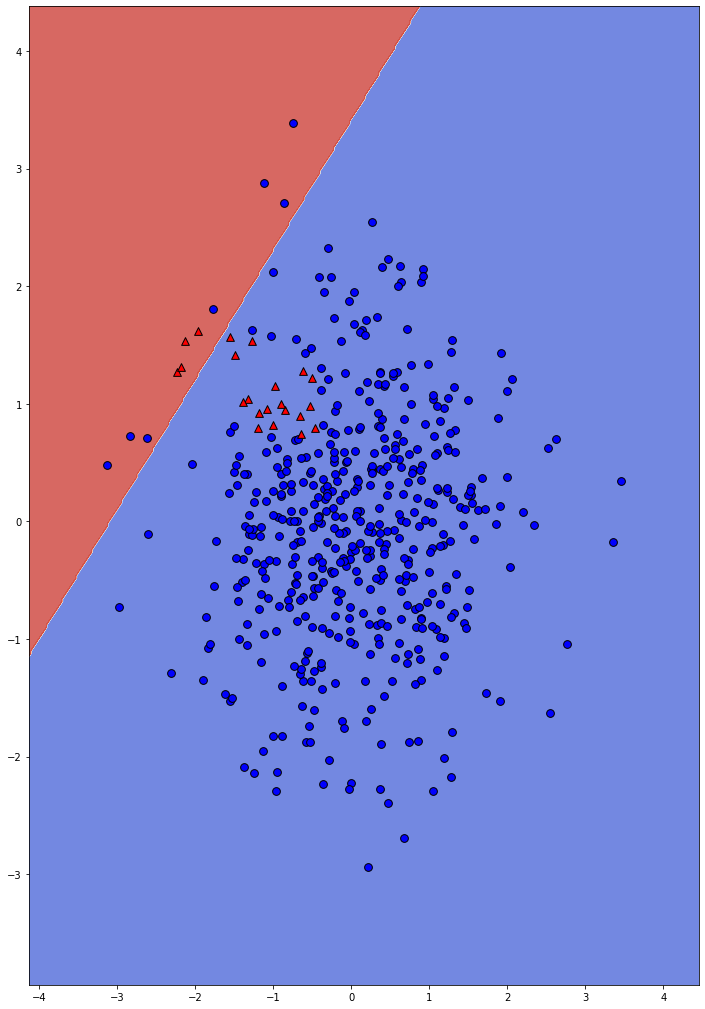

In [158]:
# Print training accuracies
print("Softmax     training accuracy:", lr_mn.score(X_train, y_train))
print("One-vs-rest training accuracy:", lr_ovr.score(X_train, y_train))

# Create the binary classifier (class 1 vs. rest)
lr_class_1 = LogisticRegression(C=100)
lr_class_1.fit(X_train, y_train==1)

# Plot the binary classifier (class 1 vs. rest)
plot_classifier(X_train, y_train==1, lr_class_1)

As you can see, the binary classifier incorrectly labels almost all points in class 1 (shown as red triangles in the final plot)! Thus, this classifier is not a very effective component of the one-vs-rest classifier. In general, though, one-vs-rest often works well.

In [156]:
X_test[0:2]

array([[-1.34465101, -2.26614044],
       [-0.32865543,  1.7199352 ]])

## One-vs-rest SVM

As motivation for the next and final chapter on support vector machines, we'll repeat the previous exercise with a non-linear SVM. Once again, the data is loaded into X_train, y_train, X_test, and y_test .

Instead of using LinearSVC, we'll now use scikit-learn's SVC object, which is a non-linear "kernel" SVM (much more on what this means in Chapter 4!). Again, your task is to create a plot of the binary classifier for class 1 vs. rest.

**Instructions**

* Fit an SVC called svm_class_1 to predict class 1 vs. other classes.
* Plot this classifier.

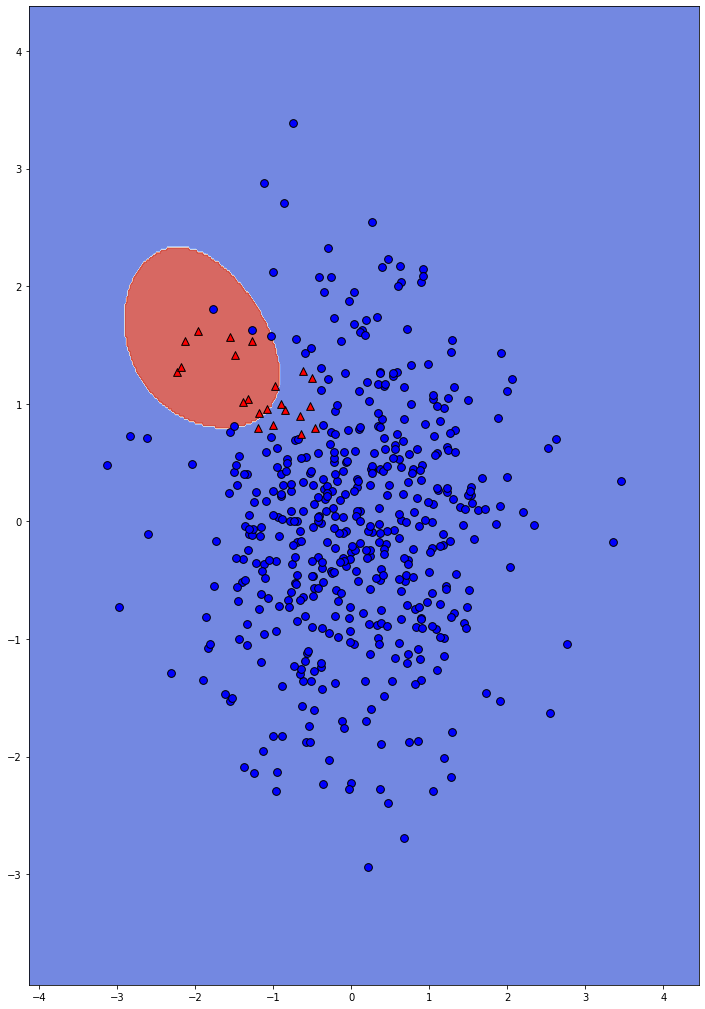

In [160]:
# We'll use SVC instead of LinearSVC from now on
from sklearn.svm import SVC

# Create/plot the binary classifier (class 1 vs. rest)
svm_class_1 = SVC()
svm_class_1.fit(X_train,y_train==1)
plot_classifier(X_train,y_train==1,svm_class_1)

The non-linear SVM works fine with one-vs-rest on this dataset because it learns to "surround" class 1.